In [1]:
import os
cwd = os.getcwd()
print("Current working directory :", cwd)

Current working directory: c:\Users\asus\Documents\Bangkit Capstone


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf

# Data Reading

In [50]:
import os

dataset_path = 'IMG_CLASSES'
data = []

for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        for file_name in os.listdir(class_dir):
            if file_name.endswith('.jpg') or file_name.endswith('.png'):
                image_path = os.path.join(class_dir, file_name)
                data.append({'Image': image_path, 'Label': class_name})

In [51]:
print(image_path)

IMG_CLASSES\9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k\v-tinea-versicolor-97.jpg


In [52]:
df = pd.DataFrame(data)

In [53]:
print(df.head())

                                 Image           Label
0   IMG_CLASSES\1. Eczema 1677\0_0.jpg  1. Eczema 1677
1   IMG_CLASSES\1. Eczema 1677\0_1.jpg  1. Eczema 1677
2  IMG_CLASSES\1. Eczema 1677\0_10.jpg  1. Eczema 1677
3  IMG_CLASSES\1. Eczema 1677\0_11.jpg  1. Eczema 1677
4  IMG_CLASSES\1. Eczema 1677\0_12.jpg  1. Eczema 1677


In [54]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27152 entries, 0 to 27151
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   27152 non-null  object
 1   Label   27152 non-null  object
dtypes: object(2)
memory usage: 424.4+ KB
None


# EDA

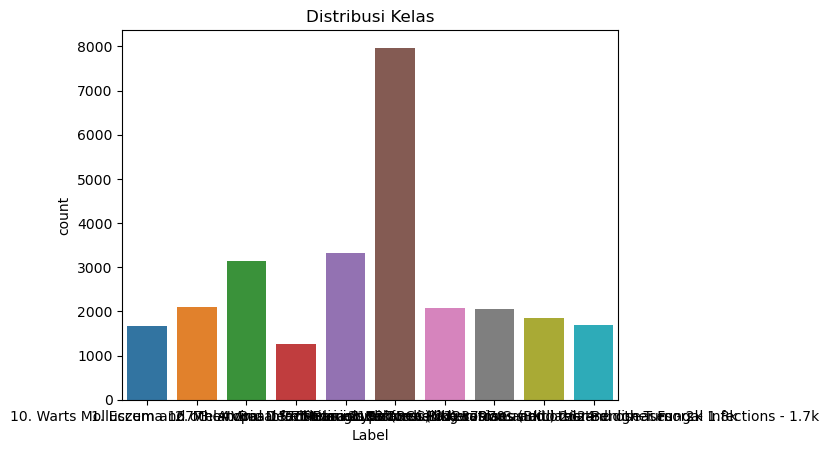

In [55]:
sns.countplot(data=df, x='Label')
plt.title('Distribusi Kelas')
plt.show()

In [56]:
class_stats = df.groupby('Label').size().reset_index(name='Count')
print(class_stats)

                                               Label  Count
0                                     1. Eczema 1677   1676
1  10. Warts Molluscum and other Viral Infections...   2103
2                                 2. Melanoma 15.75k   3140
3                       3. Atopic Dermatitis - 1.25k   1257
4                 4. Basal Cell Carcinoma (BCC) 3323   3323
5                    5. Melanocytic Nevi (NV) - 7970   7970
6        6. Benign Keratosis-like Lesions (BKL) 2624   2079
7  7. Psoriasis pictures Lichen Planus and relate...   2055
8  8. Seborrheic Keratoses and other Benign Tumor...   1847
9  9. Tinea Ringworm Candidiasis and other Fungal...   1702


In [57]:
df.describe()

Image                            Label
count                                27152                            27152
unique                               27152                               10
top     IMG_CLASSES\1. Eczema 1677\0_0.jpg  5. Melanocytic Nevi (NV) - 7970
freq                                     1                             7970

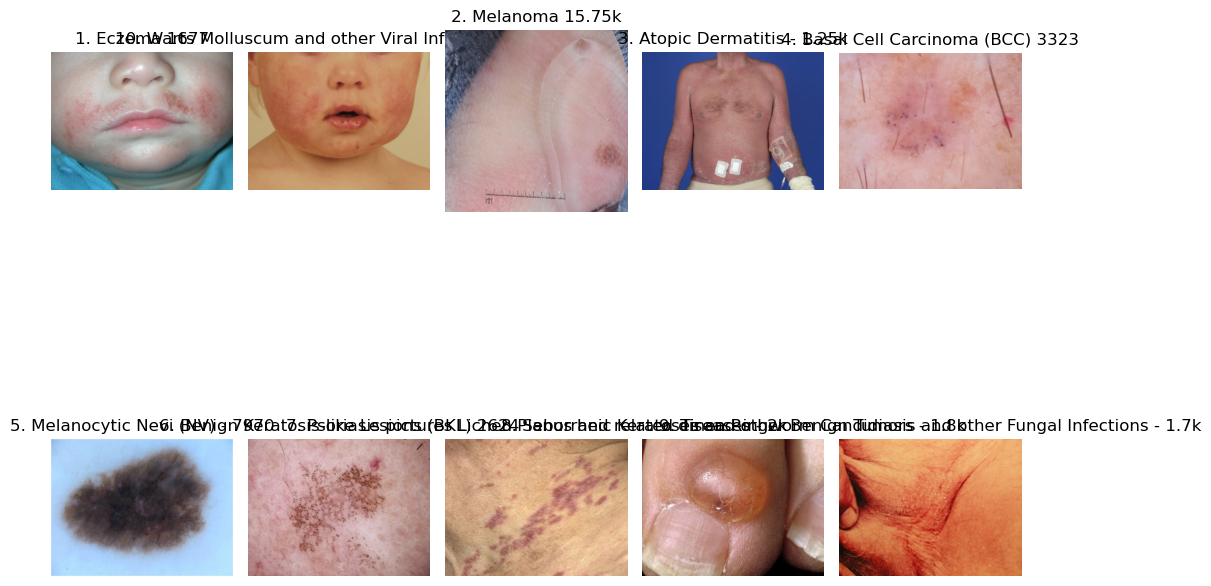

In [58]:
plt.figure(figsize=(10, 10))
for i, class_name in enumerate(class_stats['Label']):
    image_path = df.loc[df['Label'] == class_name, 'Image'].iloc[0]
    img = plt.imread(image_path)
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [13]:
!pip install opencv-python

# Pre Processing

In [14]:
conda install -c anaconda pillow

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [59]:
import os
from PIL import Image

dataset_path = 'IMG_CLASSES'
output_path = 'Resized_IMAGES'
target_size = (100, 100)  # Ubah ukuran target sesuai kebutuhan Anda

# Buat direktori output jika belum ada
if not os.path.exists(output_path):
    os.makedirs(output_path)

for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        output_class_dir = os.path.join(output_path, class_name)
        if not os.path.exists(output_class_dir):
            os.makedirs(output_class_dir)
        for file_name in os.listdir(class_dir):
            if file_name.endswith('.jpg') or file_name.endswith('.png'):
                image_path = os.path.join(class_dir, file_name)
                output_image_path = os.path.join(output_class_dir, file_name)

                # Resize gambar dan simpan dalam direktori output
                image = Image.open(image_path)
                resized_image = image.resize(target_size)
                resized_image.save(output_image_path)

                print(f"Resized {image_path} to {output_image_path}")

print("Resize selesai.")


Resized IMG_CLASSES\1. Eczema 1677\0_0.jpg to Resized_IMAGES\1. Eczema 1677\0_0.jpg
Resized IMG_CLASSES\1. Eczema 1677\0_1.jpg to Resized_IMAGES\1. Eczema 1677\0_1.jpg
Resized IMG_CLASSES\1. Eczema 1677\0_10.jpg to Resized_IMAGES\1. Eczema 1677\0_10.jpg
Resized IMG_CLASSES\1. Eczema 1677\0_11.jpg to Resized_IMAGES\1. Eczema 1677\0_11.jpg
Resized IMG_CLASSES\1. Eczema 1677\0_12.jpg to Resized_IMAGES\1. Eczema 1677\0_12.jpg
Resized IMG_CLASSES\1. Eczema 1677\0_13.jpg to Resized_IMAGES\1. Eczema 1677\0_13.jpg
Resized IMG_CLASSES\1. Eczema 1677\0_14.jpg to Resized_IMAGES\1. Eczema 1677\0_14.jpg
Resized IMG_CLASSES\1. Eczema 1677\0_15.jpg to Resized_IMAGES\1. Eczema 1677\0_15.jpg
Resized IMG_CLASSES\1. Eczema 1677\0_16.jpg to Resized_IMAGES\1. Eczema 1677\0_16.jpg
Resized IMG_CLASSES\1. Eczema 1677\0_17.jpg to Resized_IMAGES\1. Eczema 1677\0_17.jpg
Resized IMG_CLASSES\1. Eczema 1677\0_18.jpg to Resized_IMAGES\1. Eczema 1677\0_18.jpg
Resized IMG_CLASSES\1. Eczema 1677\0_19.jpg to Resized_IMA

# Data Prepare for Modelling

In [12]:
import os
import random
import shutil

dataset_path = 'Resized_IMAGES'
train_data_path = 'Train_DATA'
test_data_path = 'Test_DATA'
train_ratio = 0.8  # Ubah rasio pelatihan sesuai kebutuhan Anda

# Buat direktori train dan test jika belum ada
if not os.path.exists(train_data_path):
    os.makedirs(train_data_path)
if not os.path.exists(test_data_path):
    os.makedirs(test_data_path)

for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        images = os.listdir(class_dir)
        random.shuffle(images)
        train_count = int(len(images) * train_ratio)
        train_images = images[:train_count]
        test_images = images[train_count:]

        # Pindahkan gambar ke direktori train
        for image_name in train_images:
            src = os.path.join(class_dir, image_name)
            dst = os.path.join(train_data_path, class_name, image_name)
            if not os.path.exists(os.path.join(train_data_path, class_name)):
                os.makedirs(os.path.join(train_data_path, class_name))
            shutil.copyfile(src, dst)

        # Pindahkan gambar ke direktori test
        for image_name in test_images:
            src = os.path.join(class_dir, image_name)
            dst = os.path.join(test_data_path, class_name, image_name)
            if not os.path.exists(os.path.join(test_data_path, class_name)):
                os.makedirs(os.path.join(test_data_path, class_name))
            shutil.copyfile(src, dst)

print("Pemisahan dataset selesai.")

Pemisahan dataset selesai.


In [13]:
import os
import random
import shutil

train_data_path = 'Train_DATA'
balanced_train_data_path = 'Balanced_Train_DATA'

# Calculate desired number of samples per class
desired_samples_per_class = float('inf')  # Set an initial high value
for class_name in os.listdir(train_data_path):
    class_dir = os.path.join(train_data_path, class_name)
    if os.path.isdir(class_dir):
        class_samples = len(os.listdir(class_dir))
        desired_samples_per_class = min(desired_samples_per_class, class_samples)

# Create directory for balanced training dataset
if not os.path.exists(balanced_train_data_path):
    os.makedirs(balanced_train_data_path)

# Undersample the data and copy selected samples to the balanced training dataset
for class_name in os.listdir(train_data_path):
    class_dir = os.path.join(train_data_path, class_name)
    if os.path.isdir(class_dir):
        class_samples = os.listdir(class_dir)
        random.shuffle(class_samples)
        selected_samples = class_samples[:desired_samples_per_class]

        # Create directory for the class in the balanced training dataset
        output_class_dir = os.path.join(balanced_train_data_path, class_name)
        if not os.path.exists(output_class_dir):
            os.makedirs(output_class_dir)

        # Copy selected samples to the balanced training dataset
        for sample_name in selected_samples:
            src = os.path.join(class_dir, sample_name)
            dst = os.path.join(output_class_dir, sample_name)
            shutil.copyfile(src, dst)

print("Undersampling and creating balanced training dataset completed.")

Undersampling and creating balanced training dataset completed.


In [14]:
import os

dataset_path = 'Balanced_Train_DATA'

class_counts = {}

# Menghitung jumlah gambar untuk setiap kelas
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        images = os.listdir(class_dir)
        class_counts[class_name] = len(images)

# Menampilkan distribusi dataset
for class_name, count in class_counts.items():
    print(f"Class: {class_name}\tCount: {count}")


Class: 1. Eczema 1677	Count: 1248
Class: 10. Warts Molluscum and other Viral Infections - 2103	Count: 1248
Class: 2. Melanoma 15.75k	Count: 1248
Class: 3. Atopic Dermatitis - 1.25k	Count: 1248
Class: 4. Basal Cell Carcinoma (BCC) 3323	Count: 1248
Class: 5. Melanocytic Nevi (NV) - 7970	Count: 1248
Class: 6. Benign Keratosis-like Lesions (BKL) 2624	Count: 1248
Class: 7. Psoriasis pictures Lichen Planus and related diseases - 2k	Count: 1248
Class: 8. Seborrheic Keratoses and other Benign Tumors - 1.8k	Count: 1248
Class: 9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k	Count: 1248


In [15]:
validation_data_path = 'Validation_DATA'

if not os.path.exists(validation_data_path):
    os.makedirs(validation_data_path)

In [16]:
validation_ratio = 0.2  

for class_name in os.listdir(train_data_path):
    class_dir = os.path.join(train_data_path, class_name)
    if os.path.isdir(class_dir):
        images = os.listdir(class_dir)
        random.shuffle(images)
        validation_count = int(len(images) * validation_ratio)
        validation_images = images[:validation_count]

        # Pindahkan gambar ke direktori validasi
        for image_name in validation_images:
            src = os.path.join(class_dir, image_name)
            dst = os.path.join(validation_data_path, class_name, image_name)
            if not os.path.exists(os.path.join(validation_data_path, class_name)):
                os.makedirs(os.path.join(validation_data_path, class_name))
            shutil.copyfile(src, dst)

In [21]:
train_data_path = 'Balanced_Train_DATA'
validation_data_path = 'Validation_DATA'
test_data_path = 'Test_DATA'

def count_data(directory):
    total_count = 0
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            images = os.listdir(class_dir)
            total_count += len(images)
    return total_count

# Menghitung jumlah data pada setiap subset
train_count = count_data(train_data_path)
validation_count = count_data(validation_data_path)
test_count = count_data(test_data_path)

# Menampilkan jumlah data pada setiap subset
print("Jumlah data pelatihan:", train_count)
print("Jumlah data validasi:", validation_count)
print("Jumlah data pengujian:", test_count)

Jumlah data pelatihan: 12480
Jumlah data validasi: 5267
Jumlah data pengujian: 10857


Model Architecture

In [22]:
import tensorflow as tf
from tensorflow.keras import layers

# Definisikan arsitektur model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Tampilkan ringkasan arsitektur model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

Modelling

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definisikan path direktori data pelatihan dan validasi
train_dir = 'Balanced_Train_DATA'
validation_dir = 'Validation_DATA'

# Definisikan generator data untuk data pelatihan
train_data_generator = ImageDataGenerator(rescale=1.0/255.0)
train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse')

# Definisikan generator data untuk data validasi
validation_data_generator = ImageDataGenerator(rescale=1.0/255.0)
validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse')

# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Pelatihan model
epochs = 10

history = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=validation_generator)


Found 12480 images belonging to 10 classes.
Found 5267 images belonging to 10 classes.
Epoch 1/10
390/390 [==============================] - 625s 2s/step - loss: 1.7925 - accuracy: 0.3243 - val_loss: 1.4043 - val_accuracy: 0.4680
Epoch 2/10
390/390 [==============================] - 562s 1s/step - loss: 1.5184 - accuracy: 0.4090 - val_loss: 1.2796 - val_accuracy: 0.4952
Epoch 3/10
390/390 [==============================] - 559s 1s/step - loss: 1.4203 - accuracy: 0.4601 - val_loss: 1.1808 - val_accuracy: 0.5603
Epoch 4/10
390/390 [==============================] - 611s 2s/step - loss: 1.3202 - accuracy: 0.4926 - val_loss: 1.1111 - val_accuracy: 0.5656
Epoch 5/10
390/390 [==============================] - 574s 1s/step - loss: 1.1860 - accuracy: 0.5471 - val_loss: 1.0693 - val_accuracy: 0.5795
Epoch 6/10
390/390 [==============================] - 561s 1s/step - loss: 1.0064 - accuracy: 0.6175 - val_loss: 0.9106 - val_accuracy: 0.6676
Epoch 7/10
390/390 [==============================] - 5

Model Evaluation

In [54]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Prediksi label pada data validasi
validation_steps = len(validation_generator)
y_true = []
y_pred = []

for i in range(validation_steps):
    x_val, y_val = validation_generator[i]
    y_true.extend(y_val)
    y_pred.extend(np.argmax(model.predict(x_val), axis=1))

# Membuat confusion matrix
cm = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(cm)


1/1 [==============================] - 0s 228ms/step
Confusion Matrix:
[[ 247   11    0   20    0    0    0   19   22   14]
 [  15  267    4   26    4    0    2   22   48   29]
 [   0    7  494    6    9   78   21    0    5    3]
 [   3    3    1  219    2    1    1    4    7    8]
 [   0    3    2    5  476   24  119    2    6    1]
 [   2   13   76    6   46 1210  161    4    9    2]
 [   1    1    0    1   80   34  278    0    1    3]
 [  12   19    1   27    1    0    0  271   34   30]
 [   7   11    0    6    2    2    2   11  299   16]
 [   9    8    0    5    0    0    0   14   10  282]]


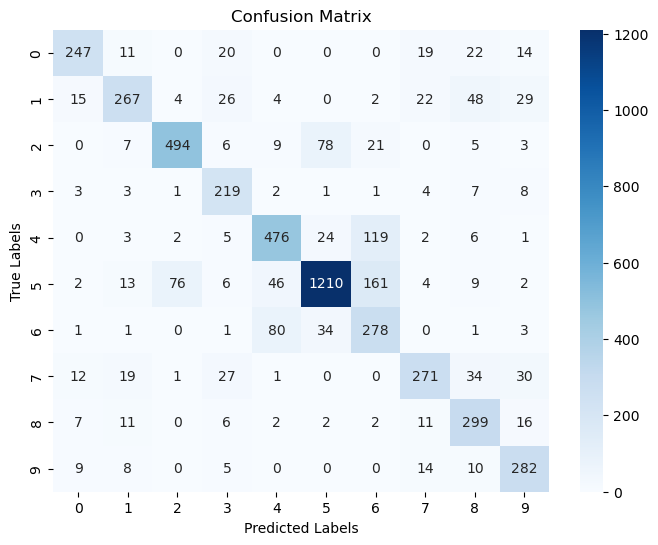

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menampilkan confusion matrix dalam bentuk plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [42]:
tn = cm[0, 0]
fp = cm[0, 1]
fn = cm[1, 0]
tp = cm[1, 1]

print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)


True Positives (TP): 267
True Negatives (TN): 247
False Positives (FP): 11
False Negatives (FN): 15


In [43]:
from sklearn.metrics import precision_score, accuracy_score, f1_score

# Menghitung presisi
precision = precision_score(y_true, y_pred, average='weighted')

# Menghitung akurasi
accuracy = accuracy_score(y_true, y_pred)

# Menghitung F1-score
f1score = f1_score(y_true, y_pred, average='weighted')

# Menampilkan hasil
print("Precision:", precision)
print("Accuracy:", accuracy)
print("F1-score:", f1score)


Precision: 0.7868374452360265
Accuracy: 0.7676096449591798
F1-score: 0.7720815479672322


In [44]:
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

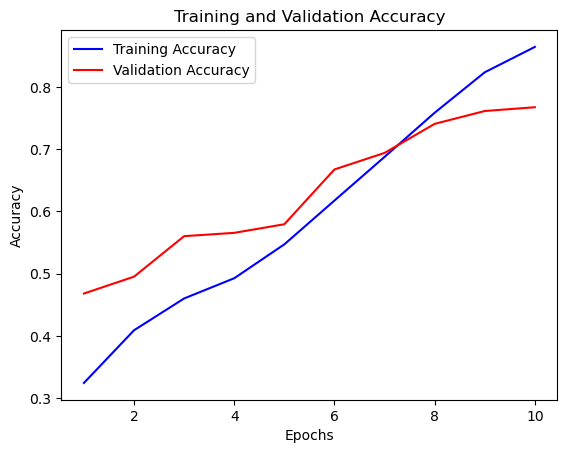

In [45]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


EVALUATION TEST DATA

In [34]:
test_dir = 'Test_DATA'

# Definisikan generator data untuk data uji
test_data_generator = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse')

# Evaluasi model menggunakan data uji
test_loss, test_accuracy = model.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Found 10857 images belonging to 10 classes.
340/340 [==============================] - 141s 413ms/step - loss: 1.0481 - accuracy: 0.7568
Test Loss: 1.0480715036392212
Test Accuracy: 0.7568389177322388


INPUT 

In [60]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Path gambar yang ingin diuji
image_path = 'eczema_test.jpg'

# Muat dan preprocess gambar
img = image.load_img(image_path, target_size=(256, 256))
img = image.img_to_array(img)
img = img / 255.0  # Normalisasi

# Ubah gambar menjadi batch tunggal
img = np.expand_dims(img, axis=0)

# Prediksi kelas gambar
prediction = model.predict(img)
predicted_class = np.argmax(prediction)

# Cetak hasil prediksi
print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 73ms/step
Predicted class: 1
